# **Latidos del corazón**

![Imagen](https://us.123rf.com/450wm/chekman/chekman1610/chekman161000213/67823931-icono-de-coraz%C3%B3n-rojo-con-el-latido-del-coraz%C3%B3n-de-signos-ilustraci%C3%B3n-del-vector-muestra-del-coraz%C3%B3n.jpg?ver=6)

Los sonidos cardíacos se producen a partir de un evento cardíaco específico, como el cierre de una válvula o la tensión de las cuerdas tendinosas.

* S1 resultado del cierre de las válvulas mitral y tricúspide.

* S2 producido por el cierre de las válvulas aórtica y pulmonar.

En medicina llamamos al sonido "lub" "S1" y al sonido "dub" "S2".

Puedes aprender una breve introducción sobre los sonidos del corazón en este video:

https://www.youtube.com/watch?v=dBwr2GZCmQM

### ¿Por qué usar Deep Learning en esto?

Es un subconjunto de las redes neuronales (un sistema informático inspirado en las redes neuronales biológicas). Y al apilar muchas capas de redes neuronales, obtendremos un modelo de aprendizaje profundo que podría contener miles de millones de parámetros y es capaz de manejar problemas muy complicados que ningún algoritmo clásico puede ser efectivo.

Deep Learning es especialmente poderoso con datos no estructurados (Imagen, Texto, Sonido, Video, …).

![Imagen](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png)

## Acerca de la data:

Es un desafío publicado en 2012 para clasificar el sonido del corazón en algunas categorías de 'AISTATS'. Los datos se han recopilado de dos fuentes (A) y (B).

A) del público en general a través de iStethoscope Pro.

B) de un ensayo clínico en hospitales utilizando el estetoscopio digital DigiScope.

Antes de trabajar en este cuaderno, manejamos las carpetas de datos y constantes ambas fuentes (A y B) para que sea fácil manejarlo.

Datos originales aquí: http://www.peterjbentley.com/heartchallenge/

## Importar bibliotecas principales

In [1]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa # Para tratar con archivos de audio
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

C:\Users\Sally\anaconda3\envs\PythonEnv\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
data_path = "C:/Users/Sally/OneDrive - Instituto Tecnológico de Las Américas (ITLA)/Python Scripts/Python/archive/Heartbeat_Sound"
print(os.listdir(data_path))
os.listdir(data_path)

['artifact', 'extrahls', 'extrastole', 'murmur', 'normal', 'set_a_weights.h5', 'unlabel']


['artifact',
 'extrahls',
 'extrastole',
 'murmur',
 'normal',
 'set_a_weights.h5',
 'unlabel']

In [6]:
tarin_data      = data_path 
unlabel_data        = data_path  + '/unlabel/'

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + '/extrahls/'

In [7]:
print("Normal files:", len(os.listdir(normal_data))) #length of normal training sounds
print("Murmur files:",len(os.listdir(murmur_data))) #length of murmur training sounds 
print("Extrastole files", len(os.listdir(extrastole_data))) #length of extrastole training sounds 
print("Artifact files:",len(os.listdir(artifact_data))) #length of artifact training sounds 
print("Extrahls files:",len(os.listdir(extrahls_data))) #length of extrahls training sounds 
print()
print('SONIDOS TOTALES:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19

SONIDOS TOTALES: 585


In [8]:
print("Sonidos de prueba: ", len(os.listdir(unlabel_data)))

Sonidos de prueba:  247


## EDA y Visualización

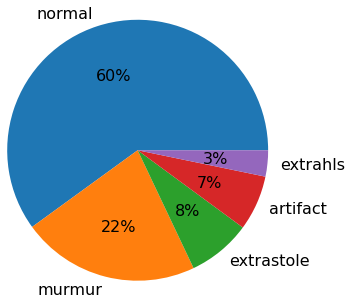

In [9]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

__La figura muestra datos desequilibrados, por lo que debemos corregirlos más tarde.__

## Visualización de muestra aleatoria

In [10]:
def visulize_random_sample(folder_name):

# Para escuchar la muestra de audio

  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio

In [11]:
visulize_random_sample(normal_data)

## 1. Sonido normal

La mayoría de las frecuencias cardíacas normales en reposo estarán entre 60 y 100 latidos (‘lub dubs’) por minuto.

In [12]:
# Elija un sonido aleatorio de la carpeta normal

random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)

### Forma de onda

El sonido es la presión del aire que se propaga a tu oído. El archivo de audio digital se obtiene de un sensor de sonido que puede detectar ondas de sonido y convertirlas en señales eléctricas.

Específicamente, nos informa sobre el desplazamiento de la onda y cómo cambia con el tiempo.

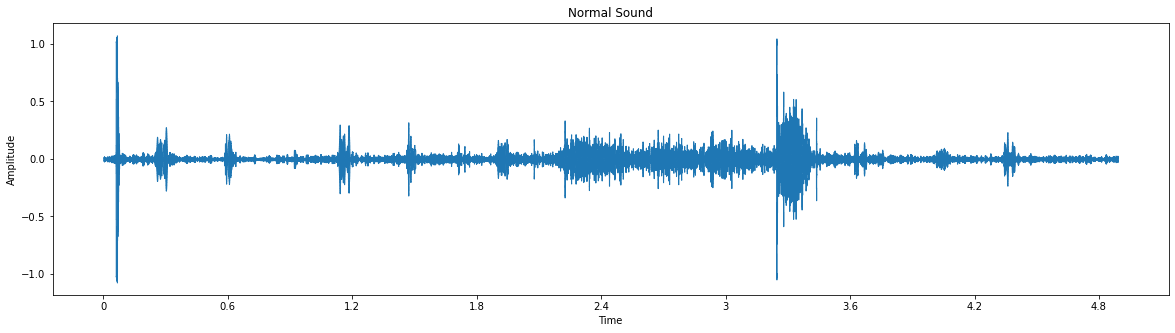

In [13]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(normal_sound_sample, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Eje X, representa el tiempo. El eje Y mide el desplazamiento de las moléculas de aire. Aquí es donde entra en juego la amplitud. Mide cuánto se desplaza una molécula de su posición de reposo.

### Espectro

Un espectro de sonido es una representación de un sonido, generalmente una pequeña muestra de un sonido, en términos de la cantidad de vibración en cada frecuencia individual. Por lo general, se presenta como un gráfico de potencia o presión en función de la frecuencia. La potencia o presión suele medirse en decibelios y la frecuencia se mide en vibraciones por segundo (o hercios, abreviatura Hz) o miles de vibraciones por segundo (kilohercios, abreviatura kHz).

El espectro expresa la composición de frecuencias del sonido y se obtiene analizando el sonido. Un espectro de sonido generalmente se representa en un plano de coordenadas donde la frecuencia f se traza a lo largo del eje de abscisas y la amplitud A, o intensidad, de un componente armónico con una frecuencia dada se traza a lo largo del eje de ordenadas.

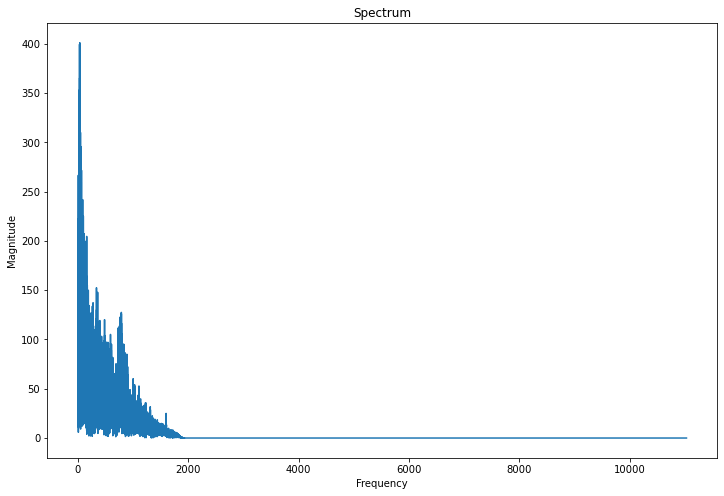

In [14]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Espectrograma

Para nosotros, como humanos, percibimos un sonido no solo en un momento determinado por su intensidad, sino también por su tono. El tono es la frecuencia del sonido: un tono más alto corresponde a una frecuencia más alta y viceversa. Entonces, para tener una representación más cercana a nuestro cerebro, podemos agregar otra dimensión, la frecuencia, a nuestra representación, que es el Espectrograma.

Un espectrograma es una representación visual del espectro de frecuencias de una señal a medida que varía con el tiempo. Cuando se aplican a una señal de audio, los espectrogramas a veces se denominan ecografías, huellas de voz o diagramas de voz.

Los espectrogramas se utilizan ampliamente en los campos de la música, la lingüística, el sonar, el radar, el procesamiento del habla, la sismología y otros. Los espectrogramas de audio se pueden usar para identificar fonéticamente las palabras habladas y para analizar las diversas llamadas de los animales. Se pueden generar mediante un espectrómetro óptico, un banco de filtros de paso de banda, mediante la transformada de Fourier o mediante una transformada de ondas.

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

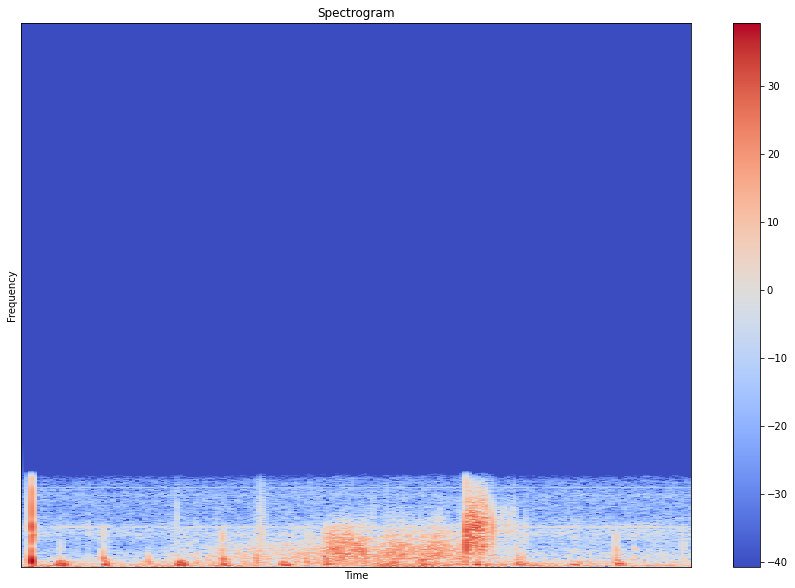

In [15]:
# STFT = espectrograma

hop_length = 512 # En núm. de muestras
n_fft = 2048 # Ventana en núm. de muestras

# Calcular la duración del salto y la ventana en segundos

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Realizar stft

stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

# Calcular el valor abs de números complejos para obtener la magnitud

spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# Espectrograma de visualización

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

# plt.set_cmap("YlOrBr")

plt.title("Spectrogram")

__Tenemos una imagen que representa un sonido. El eje X es para el tiempo, el eje Y es para la frecuencia y el color es para la intensidad.__

### MFCCs

No podemos tomar la señal de audio sin procesar como entrada para nuestro modelo porque habrá mucho ruido en la señal de audio. Se observa que extraer características de la señal de audio y usarla como entrada para el modelo base producirá un rendimiento mucho mejor que considerar directamente la señal de audio sin procesar como entrada. MFCC es la técnica ampliamente utilizada para extraer las características de la señal de audio.

En el procesamiento de sonido, el cepstrum de frecuencia mel (MFC) es una representación del espectro de potencia a corto plazo de un sonido, basado en una transformada de coseno lineal de un espectro de potencia logarítmica en una escala de frecuencia mel no lineal.

Los coeficientes cepstrales de frecuencia Mel (MFCC) son coeficientes que en conjunto forman un MFC. Se derivan de un tipo de representación cepstral del clip de audio (un "espectro de un espectro" no lineal). La diferencia entre el cepstrum y el cepstrum de frecuencia mel es que en el MFC, las bandas de frecuencia están igualmente espaciadas en la escala mel, que se aproxima más a la respuesta del sistema auditivo humano que las bandas de frecuencia espaciadas linealmente utilizadas en el espectro normal. Esta deformación de frecuencia puede permitir una mejor representación del sonido, por ejemplo, en la compresión de audio.

__Los MFCC se derivan comúnmente de la siguiente manera:__

1- Tome la transformada de Fourier de (un extracto en ventana de) una señal.

2- Mapee las potencias del espectro obtenido arriba en la escala de mel, utilizando ventanas superpuestas triangulares o, alternativamente, ventanas superpuestas de coseno.

3- Tomar los registros de las potencias en cada una de las frecuencias mel.

4- Tomar la transformada de coseno discreta de la lista de potencias logarítmicas de mel, como si fuera una señal.

5- Los MFCCs son las amplitudes del espectro resultante.

C:\Users\Sally\AppData\Local\Temp\ipykernel_9452\148065183.py:5: FutureWarning: Pass y=[ 5.8521461e-03  6.2960652e-03  6.4456435e-03 ... -1.3371154e-04
 -7.9348929e-06  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(normal_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


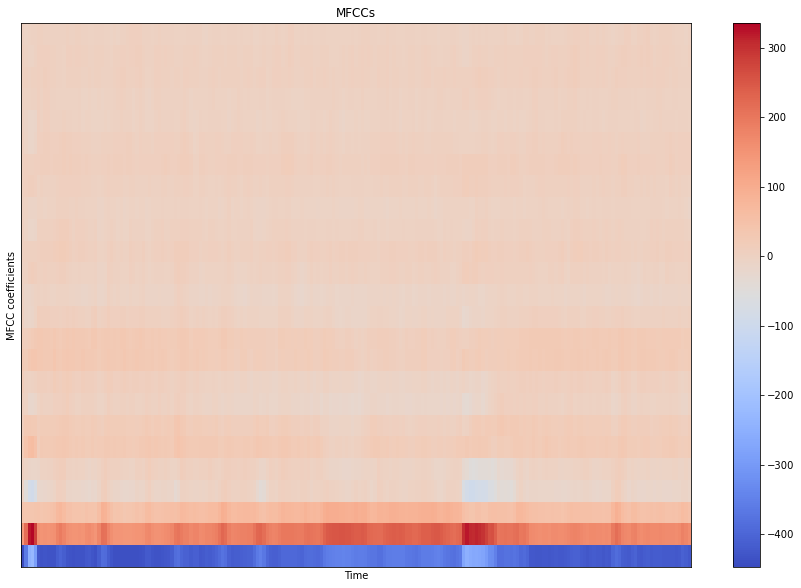

In [16]:
# MFCCs

# Extraer 25 MFCCs

MFCCs = librosa.feature.mfcc(normal_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# Mostrar MFCCs

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()

# plt.set_cmap("YlOrBr")

plt.title("MFCCs")

# Mostrar parcelas

plt.show()

## 2. Sonido de murmullo

Los soplos cardíacos suenan como si hubiera un ruido de "silbido, rugido, retumbar o fluido turbulento" en una de dos ubicaciones temporales: (1) entre "lub" y "dub", o (2) entre "dub" y "lub". ”. Pueden ser un síntoma de muchos trastornos cardíacos, algunos graves.

In [17]:
# Elija un sonido aleatorio de la carpeta de murmullos

random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

### Forma de onda

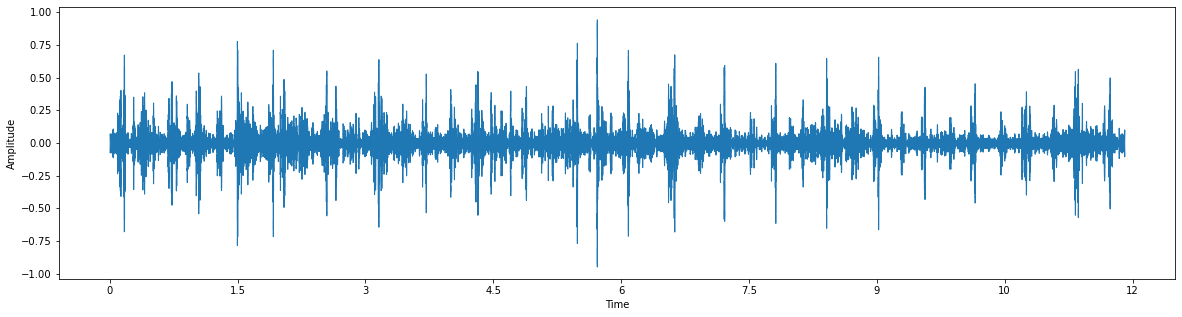

In [18]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Espectro

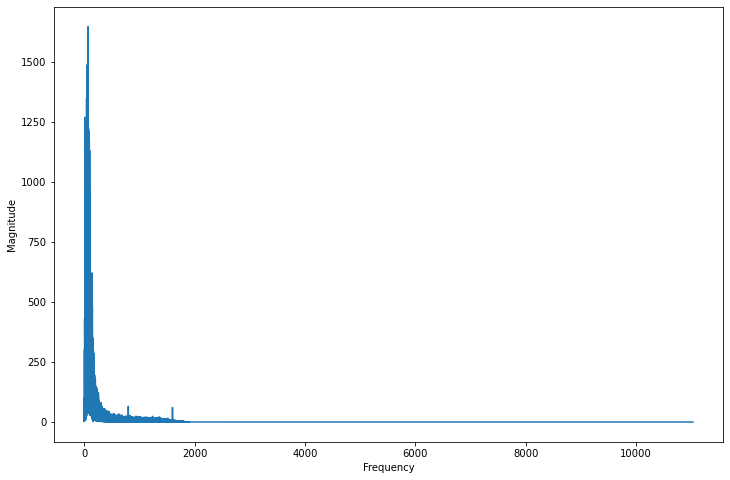

In [19]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur)) 
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Espectrograma

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

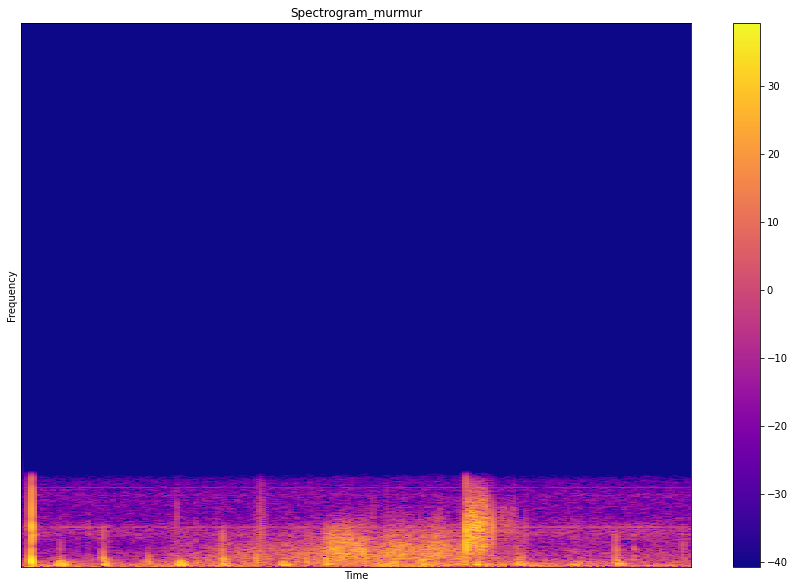

In [20]:
# STFT -> Espectrograma

hop_length = 512 # En núm. de muestras
n_fft = 2048 # Ventana en núm. de muestras

# Calcular la duración del salto y la ventana en segundos

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Realizar stft

stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

# Calcular valores abs en números complejos para obtener la magnitud

spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

# Espectrograma de visualización

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

### MFCCs

C:\Users\Sally\AppData\Local\Temp\ipykernel_9452\3928816899.py:5: FutureWarning: Pass y=[0.05761814 0.06477263 0.06941648 ... 0.01878232 0.01433478 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_murmur = librosa.feature.mfcc(murmur_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


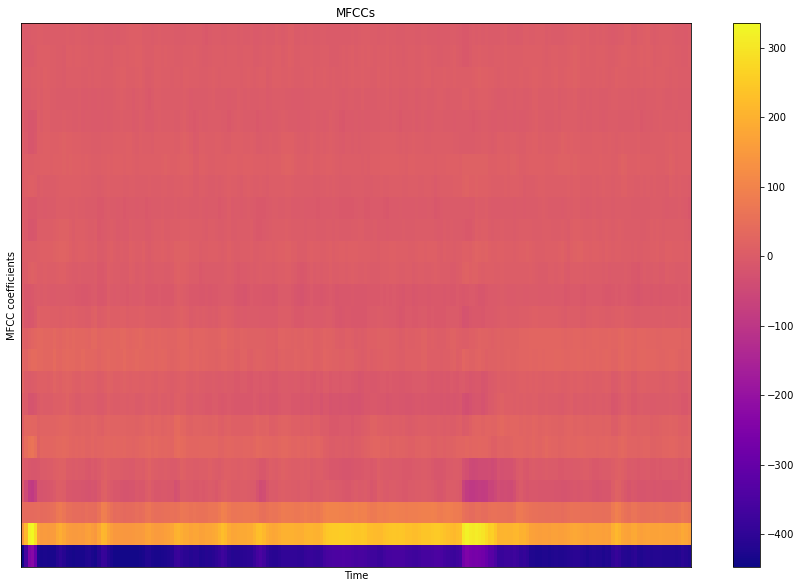

In [21]:
# MFCCs

# Extraer 25 MFCCs

MFCCs_murmur = librosa.feature.mfcc(murmur_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# Mostrar MFCCs

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs")

# Mostrar parcelas

plt.show()

## 3. Sonido extrasístole

* Los sonidos de extrasístole pueden aparecer ocasionalmente y pueden identificarse porque hay un sonido cardíaco fuera de ritmo que involucra latidos cardíacos adicionales o salteados, p. un “lub-lub dub” o un “lub dub-dub”.

In [22]:
# Elija un sonido aleatorio de la carpeta extrasístole

random_extrastole= np.random.randint(0,len(os.listdir(extrastole_data))) 
extrastole_sound = os.listdir(extrastole_data)[random_extrastole]
extrastole_sound_address = extrastole_data+extrastole_sound
extrastole_sound_sample,sample_rate = librosa.load(extrastole_sound_address)
ipd.Audio(extrastole_sound_sample,rate=sample_rate)

### Forma de onda

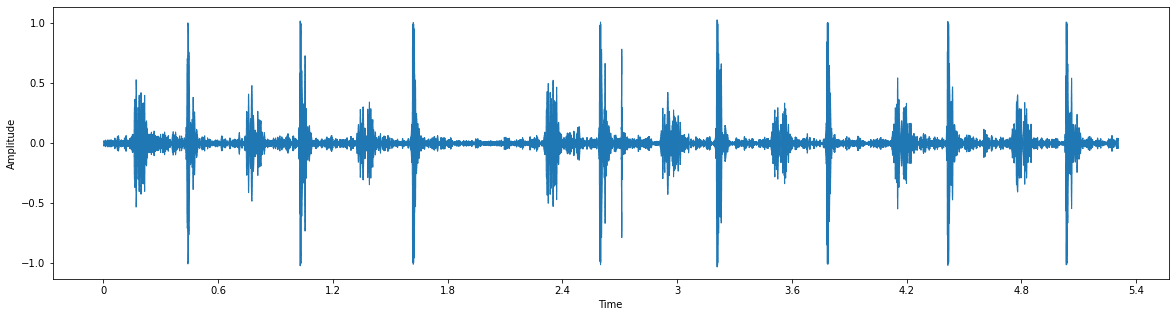

In [23]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrastole_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Espectro

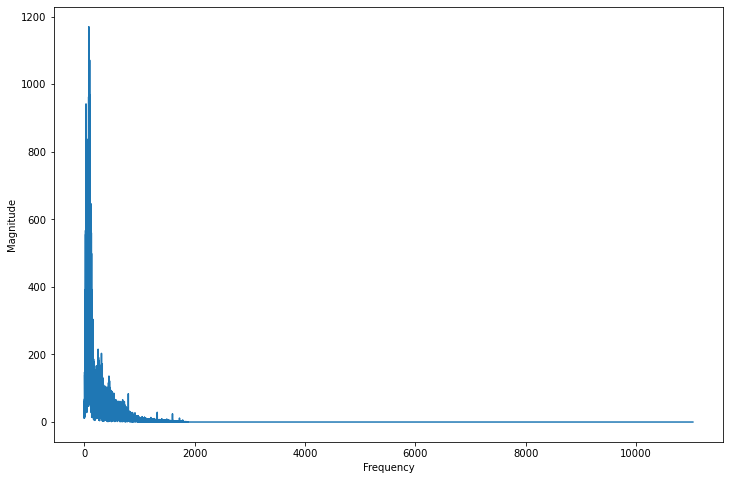

In [24]:
fft_extrastole = np.fft.fft(extrastole_sound_sample)
magnitude_extrastole = np.abs(fft_extrastole)
freq_extrastole = np.linspace(0,sample_rate, len(magnitude_extrastole)) 
half_freq = freq_extrastole[:int(len(freq_extrastole)/2)]
half_magnitude = magnitude_extrastole[:int(len(freq_extrastole)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Espectrograma

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrastole')

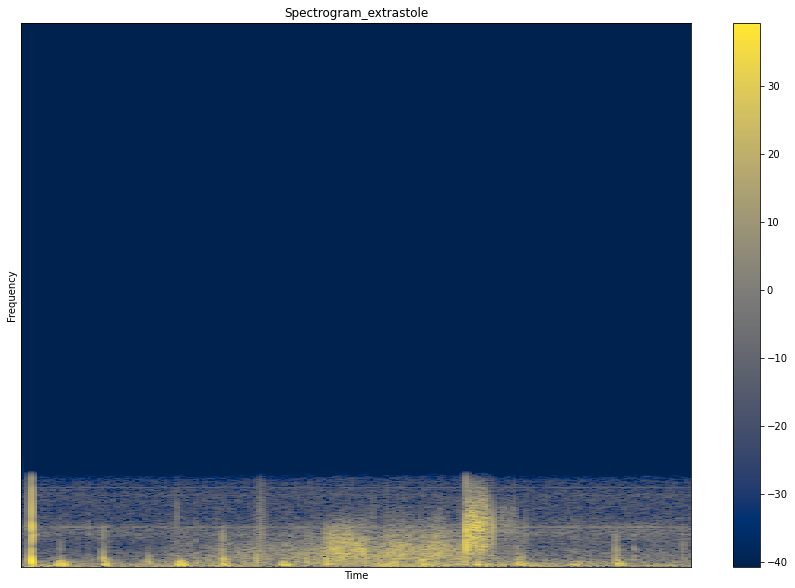

In [25]:
# STFT = Espectrograma

hop_length = 512 # En núm. de muestras
n_fft = 2048 # Ventana en núm. de muestras

# Calcular la duración del salto y la ventana en segundos

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Realizar stft

stft_extrastole = librosa.stft(extrastole_sound_sample, n_fft=n_fft, hop_length=hop_length)

# Calcular valores abs en números complejos para obtener la magnitud

spectrogram_extrastole = np.abs(stft_extrastole)
log_spectrogram_extrastole = librosa.amplitude_to_db(spectrogram_extrastole)

# Espectrograma de visualización

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("Spectrogram_extrastole")

### MFCCs

C:\Users\Sally\AppData\Local\Temp\ipykernel_9452\3073057752.py:5: FutureWarning: Pass y=[ 0.01109131  0.01204544  0.01245444 ... -0.00483952 -0.0025865
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_extrastole = librosa.feature.mfcc(extrastole_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


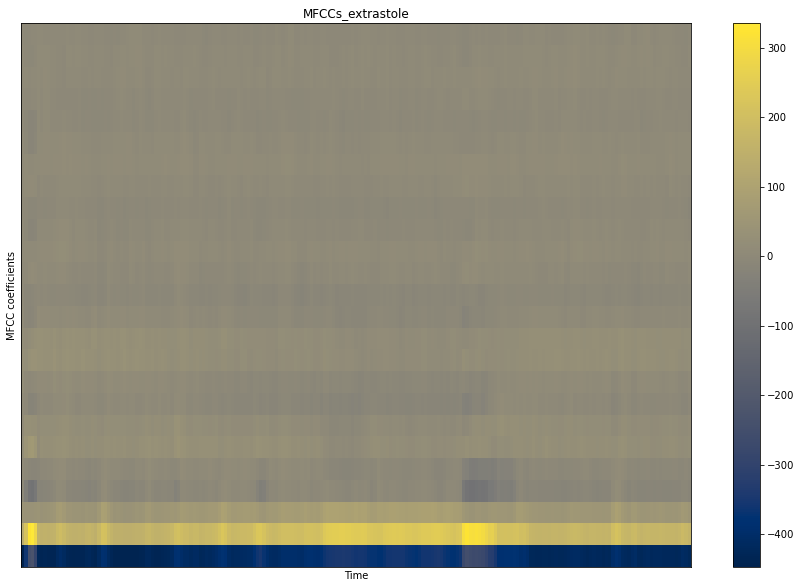

In [26]:
# MFCCs

# Extraer 25 MFCCs

MFCCs_extrastole = librosa.feature.mfcc(extrastole_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# Mostrar MFCCs

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("MFCCs_extrastole")

# Mostrar parcelas

plt.show()

## 4. Sonido de artefacto

* En la categoría Artefacto hay una amplia gama de sonidos diferentes, incluidos chillidos y ecos de retroalimentación, voz, música y ruido.

In [27]:
# Elija un sonido aleatorio de la carpeta de artefactos

random_artifact= np.random.randint(0,len(os.listdir(artifact_data))) 
artifact_sound = os.listdir(artifact_data)[random_artifact]
artifact_sound_address = artifact_data+artifact_sound
artifact_sound_sample,sample_rate = librosa.load(artifact_sound_address)
ipd.Audio(artifact_sound_sample,rate=sample_rate)

### Forma de onda

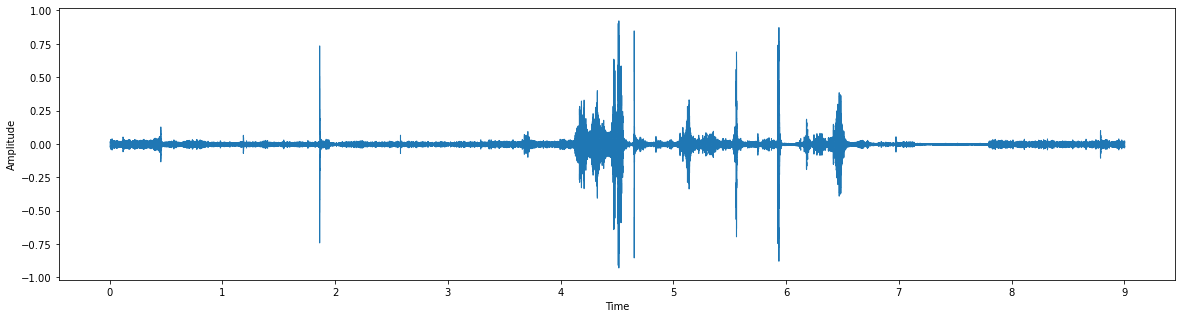

In [28]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(artifact_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Espectro

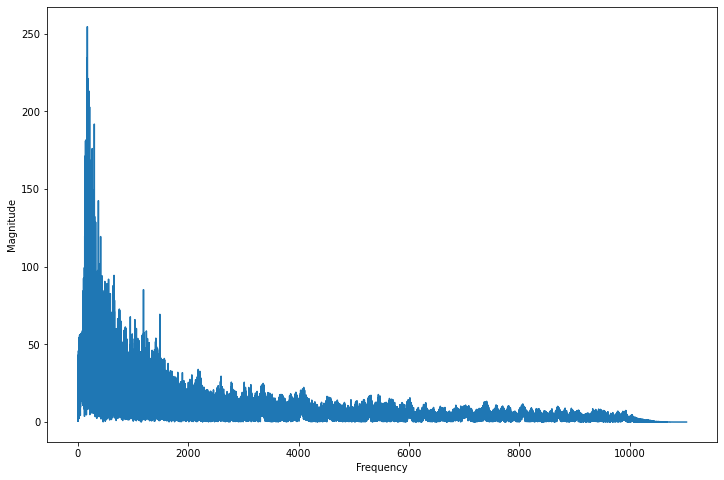

In [29]:
fft_artifact = np.fft.fft(artifact_sound_sample)
magnitude_artifact = np.abs(fft_artifact)
freq_artifact = np.linspace(0,sample_rate, len(magnitude_artifact)) 
half_freq = freq_artifact[:int(len(freq_artifact)/2)]
half_magnitude = magnitude_artifact[:int(len(freq_artifact)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Espectrograma

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_artifacte')

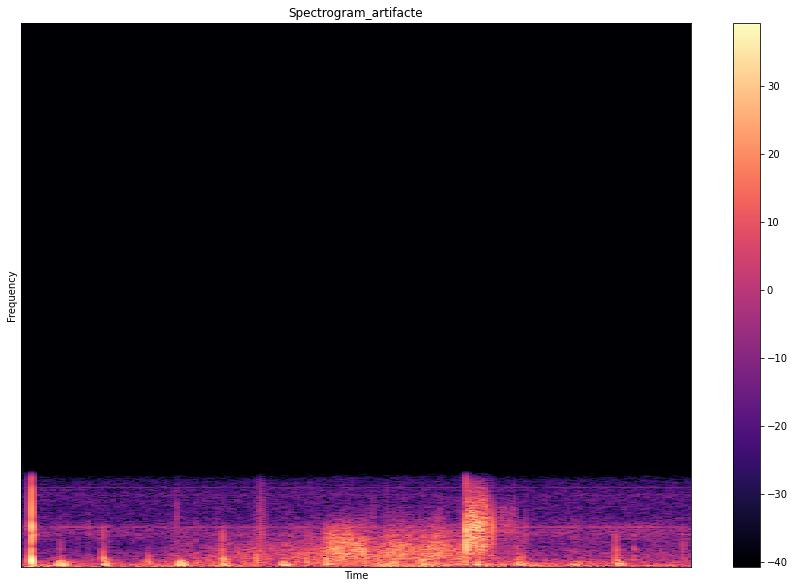

In [30]:
# STFT -> Espectrograma

hop_length = 512 # En núm. de muestras
n_fft = 2048 # Ventana en núm. de muestras

# calculate duration hop length and window in seconds

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Realizar stft

stft_artifact = librosa.stft(artifact_sound_sample, n_fft=n_fft, hop_length=hop_length)

# Calcular el valor abs de números complejos para obtener la magnitud

spectrogram_artifact = np.abs(stft_artifact)
log_spectrogram_artifact = librosa.amplitude_to_db(spectrogram_artifact)

# Espectrograma de visualización

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("magma")
plt.title("Spectrogram_artifacte")

### MFCCs

C:\Users\Sally\AppData\Local\Temp\ipykernel_9452\3231106102.py:5: FutureWarning: Pass y=[-1.8542072e-05  1.6477050e-03  9.5628770e-03 ...  1.1211711e-02
  2.1791933e-03 -1.5533315e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_artifact = librosa.feature.mfcc(artifact_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


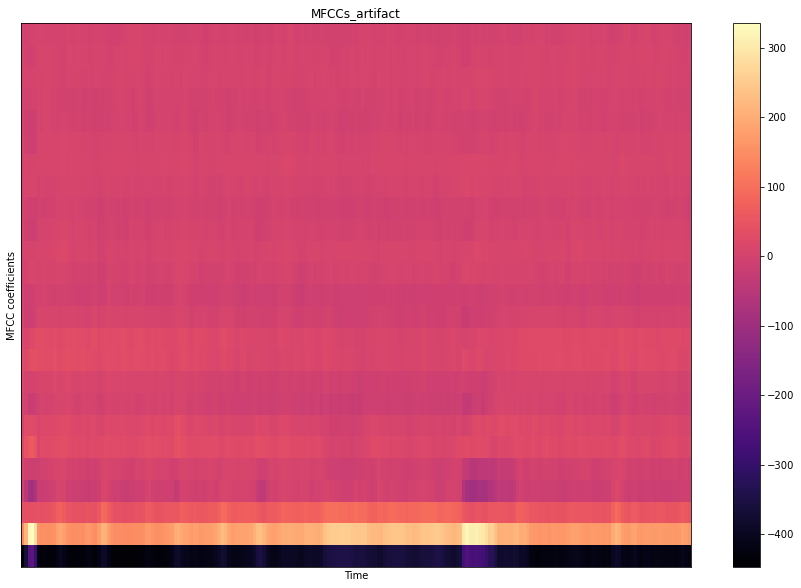

In [31]:
# MFCCs

# Extraer 25 MFCCs

MFCCs_artifact = librosa.feature.mfcc(artifact_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# Mostrar MFCCs

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("magma")
plt.title("MFCCs_artifact")

# Mostrar parcelas

plt.show()

## 5. Sonido extra del corazón

Los sonidos cardíacos adicionales se pueden identificar porque hay un sonido adicional, p. un “lub-lub dub” o un “lub dub-dub”.

In [32]:
# Elija un sonido aleatorio de la carpeta extrahls

random_extrahls= np.random.randint(0,len(os.listdir(extrahls_data))) 
extrahls_sound = os.listdir(extrahls_data)[random_extrahls]
extrahls_sound_address = extrahls_data+extrahls_sound
extrahls_sound_sample,sample_rate = librosa.load(extrahls_sound_address)
ipd.Audio(extrahls_sound_sample,rate=sample_rate)

### Forma de onda

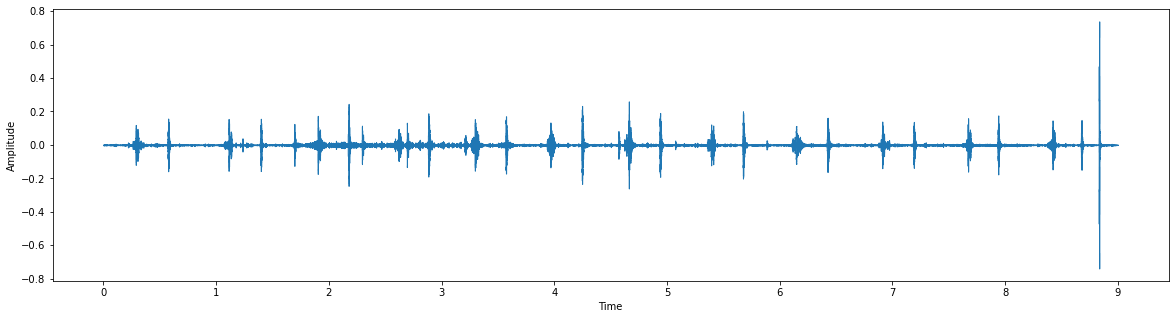

In [30]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrahls_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Espectro

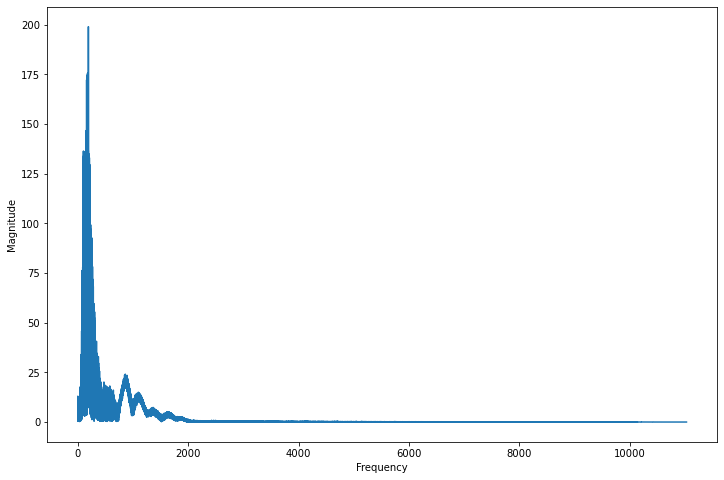

In [31]:
fft_extrahls = np.fft.fft(extrahls_sound_sample)
magnitude_extrahls = np.abs(fft_extrahls)
freq_extrahls = np.linspace(0,sample_rate, len(magnitude_extrahls)) 
half_freq = freq_extrahls[:int(len(freq_extrahls)/2)]
half_magnitude = magnitude_extrahls[:int(len(freq_extrahls)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Espectrograma

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrahlse')

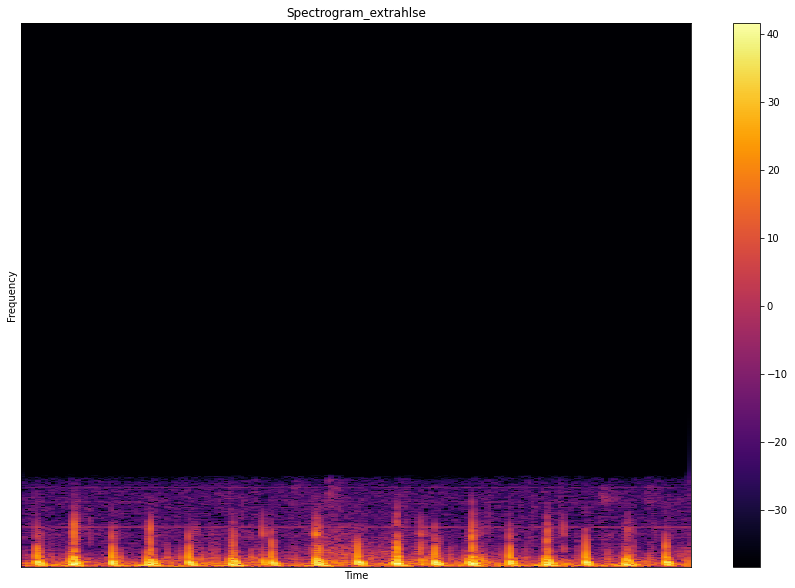

In [32]:
# STFT -> Espectrograma

hop_length = 512 # En núm. de muestras
n_fft = 2048 # Ventana en núm. de muestras

# Calcular la duración del salto y la ventana en segundos

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Realizar stft

stft_extrahls = librosa.stft(extrahls_sound_sample, n_fft=n_fft, hop_length=hop_length)

# Calcular valores abs en números complejos para obtener la magnitud

spectrogram_extrahls = np.abs(stft_extrahls)
log_spectrogram_extrahls = librosa.amplitude_to_db(spectrogram_extrahls)

# Espectrograma de visualización

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("Spectrogram_extrahlse")

### MFCCs

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13948\104501546.py:5: FutureWarning: Pass y=[-2.4044092e-04 -3.4074869e-04 -2.0483663e-05 ... -4.0383474e-04
 -3.2366568e-04  2.3732211e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_extrahls = librosa.feature.mfcc(extrahls_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


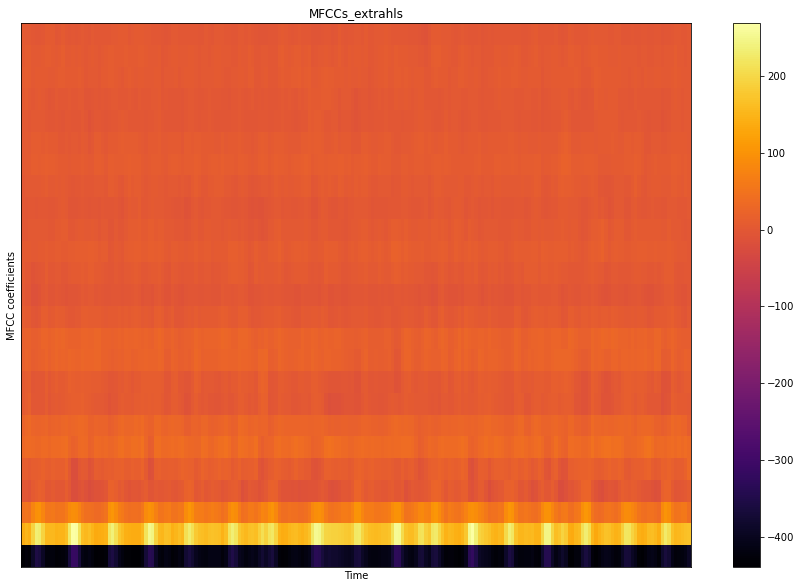

In [33]:
# MFCCs

# Extraer 25 MFCCs

MFCCs_extrahls = librosa.feature.mfcc(extrahls_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# Mostrar MFCCs

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("MFCCs_extrahls")

# Mostrar parcelas

plt.show()

## Cargando los datos

La siguiente función se repite en cada archivo de audio y extrae las características de mfcc y la salida es una matriz numpy que contiene estos mfcc.

In [34]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad archivo de audio de la misma duración
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # Extraer la función mfcc normalizada de los datos
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

## Preprocesamiento:

### Codificación

In [35]:
# Codificación simple de categorías, convertir a solo 3 tipos:

# Normal (Incluye extrahls y extrasístole)
# Murmullo
# Artefacto

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Asignar texto de etiqueta a entero

CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Asignar valor entero a etiquetas de texto

label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [36]:
# 22 KHz

SAMPLE_RATE = 22050

# Segundos

MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]

extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")

load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105040918.wav


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13948\3791901763.py:13: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : artifact__201105040918.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/artifact/artifact__201106010559.wav
fixing audio lenght : artif

In [37]:
# Archivos unlabel_datala

Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]

print ("Loading of unlabel data done")

load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_A.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_D.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_F.wav
fixing audio lenght : Bunlabelledtest__101_1305030823364_F.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__103_1305031931979_A.wav


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13948\3791901763.py:13: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : Bunlabelledtest__103_1305031931979_A.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__103_1305031931979_C.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_C.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__105_1305033453095_B.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__105_1305033453095_D.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__106_1306776721273_B.wav
fixing audio lenght : Bunlabelledtest__106_1306776721273_B.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__106_1306776721273_D.wav
fixing audio lenght : Bunlabelledtest__106_1306776721273_D.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunlabelledtest__107_1305654946865_B.wav
fixing audio lenght : Bunlabelledtest__107_1305654946865_B.wav
load file  C:/Users/Usuario/Downloads/Heartbeat_Sound/unlabel/Bunla

### Conncatenación

In [38]:
# Combinar set-a y set-b

x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds,extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels,extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [39]:
x_data.shape

(585, 25, 1)

### División de validación de prueba de tren

In [40]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

# Dividir los datos en Entrenamiento, Validación y Prueba

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# Codificación One-Hot para clases

y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

__Corrija los datos desequilibrados utilizando el peso de la clase__

In [41]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  # artifact
COUNT_1 = 129 # murmur
COUNT_2 = 409 # normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

## Modelo LSTM

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 256)          133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 128)           32896     
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 dense_1 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 25, 64)            4160      
                                                        

In [44]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [46]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=50,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val))

Epoch 1/50
125/125 [==============================] - 45s 204ms/step - loss: 0.8511 - acc: 0.5321 - val_loss: 0.7388 - val_acc: 0.3936 - lr: 0.0010
Epoch 2/50
125/125 [==============================] - 25s 198ms/step - loss: 0.6042 - acc: 0.5909 - val_loss: 0.7941 - val_acc: 0.3191 - lr: 8.0000e-04
Epoch 3/50
125/125 [==============================] - 16s 131ms/step - loss: 0.6019 - acc: 0.5455 - val_loss: 0.6165 - val_acc: 0.7447 - lr: 6.4000e-04
Epoch 4/50
125/125 [==============================] - 16s 124ms/step - loss: 0.4995 - acc: 0.6230 - val_loss: 0.6921 - val_acc: 0.5213 - lr: 5.1200e-04
Epoch 5/50
125/125 [==============================] - 21s 171ms/step - loss: 0.4909 - acc: 0.6578 - val_loss: 0.5690 - val_acc: 0.8085 - lr: 4.0960e-04
Epoch 6/50
125/125 [==============================] - 20s 163ms/step - loss: 0.4530 - acc: 0.6658 - val_loss: 0.6410 - val_acc: 0.6915 - lr: 3.2768e-04
Epoch 7/50
125/125 [==============================] - 15s 122ms/step - loss: 0.4454 - acc: 0

<AxesSubplot:>

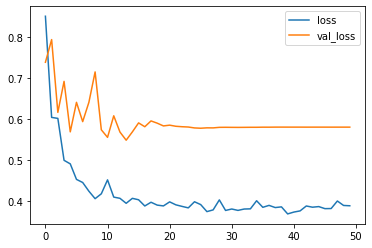

In [47]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

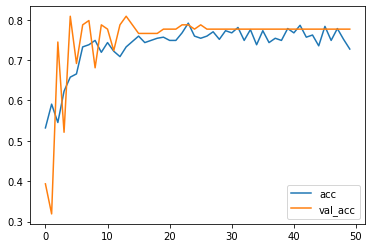

In [48]:
losses[['acc','val_acc']].plot()

## Predicción

In [49]:
# Haz una predicción

y_pred = model.predict(x_test, batch_size=5)

# Comprobar puntuaciones

scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

4/4 [==============================] - 0s 38ms/step - loss: 0.5460 - acc: 0.7692
Model evaluation accuracy:  77 %


## Guardando y cargando modelo

In [50]:
model.save('heart_sounds.h5')

In [51]:
# Clase de predicción 

y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

4/4 [==============================] - 0s 38ms/step
prediction test return : 1 - murmur


In [52]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  # pad archivo de audio de la misma duración
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [53]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

4/4 [==============================] - 0s 35ms/step


In [54]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       1.00      0.88      0.93         8
      murmur       0.43      0.73      0.54        22
      normal       0.92      0.77      0.84        87

    accuracy                           0.77       117
   macro avg       0.78      0.79      0.77       117
weighted avg       0.83      0.77      0.79       117



## Opciones de tratamiento para los latidos cardíacos anormales:

El tratamiento depende de la causa. Es posible que deba hacer cambios en su estilo de vida, como aumentar su nivel de actividad o cambiar su dieta (por ejemplo, limitar su consumo de cafeína). Si fuma, su médico le ayudará a dejar de fumar. También es posible que necesite medicamentos para controlar los latidos cardíacos anormales, así como cualquier síntoma secundario.

Para anomalías graves que no desaparecen con cambios de comportamiento o medicamentos, su médico puede recomendar:

1- cateterismo cardíaco para diagnosticar un problema cardíaco

2- ablación con catéter para destruir tejido que causa ritmos anormales

3- cardioversión por medicación o descarga eléctrica al corazón

4- implante de marcapasos o desfibrilador cardioversor

5- cirugía para corregir una anomalía

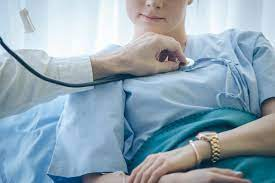

Recursos:

Sonidos de la respiración, https://medlineplus.gov/ency/article/007535.htm

Clasificación del desafío de los sonidos del corazón, http://www.peterjbentley.com/heartchallenge/#aboutdata

Aprendizaje profundo de audio simplificado: clasificación de sonido, paso a paso, https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

Revisión del tema de los sonidos del corazón, https://www.healio.com/cardiology/learn-the-heart/cardiology-review/topic-reviews/heart-sounds

Aprendizaje profundo (para audio) con curso de Python, https://youtube.com/playlist?list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf

# Gracias por su atención